# 광고 캠페인 전환율 및 성과 분석

#### 데이터 내 변수 설명
* ad_id : 각각의 광고에 대한 고유한(unique)한 ID입니다.
* xyzcampaignid : XYZ 회사에서 부여한 각 AD의 캠페인 ID
* fbcampaignid : Facebook에서 부여한 각 AD의 캠페인 ID
* age : 각 AD가 노출된 사용자의 나이
* gender : 각 AD가 노출된 사용자의 성별
* interest : 사용자의 Facebook 공개프로필에 기반해서 파악한 사용자의 관심사 code
* Impressions : 광고가 노출된 횟수
* Clicks : 광고가 클릭된 횟수
* Spent : xyz가 해당 AD에 Facebook에 지출한 비용(paid)
* Total conversion : 광고를 본 후에 제품에 문의를 준 사람의 수
* Approved conversion : 광고를 본 후에 제품을 실제로 구매한 사람의 수

### 분석 목표
1. 성별, 흥미, 노출, 클릭 수 상관관계 분석 - xyz가 어떤 광고일지 유추해보기 
2. 클릭 대비 구매 비율 파악(CVR) - 광고 효용 분석 및 개선점 파악 
3. 클릭 대비 비용 
4. 노출 횟수 대비 클릭 비율(CTR) - 광고 집행의 의미?
5. 클릭 대비 문의 비율 
6. 문의 대비 구매 비율

## 1. 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
campaign = pd.read_csv("C:/Users/Yeji/Desktop/태블로/4주차/KAG_conversion_data.csv")
print(campaign.shape)
campaign.head()

(1143, 11)


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
# null 값 여부 확인

campaign.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


## 2. EDA 분석

In [6]:
campaign.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


## 3. Correlation Matrix로 상관분석

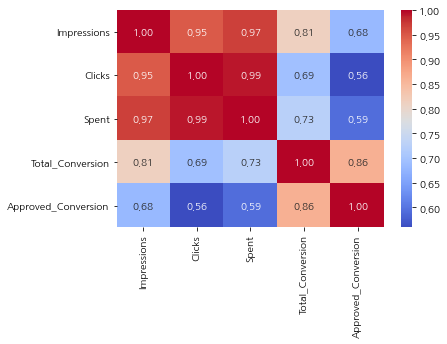

In [7]:
#평가지표 상관관걔 분석
heat = sns.heatmap(campaign[['Impressions', 'Clicks', 'Spent', 'Total_Conversion',
                             'Approved_Conversion']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

광고에 지출한 비용(Spent)과 광고 노출 횟수(Impressions)가 0.97로 가장 높은 상관관계를 가짐을 알 수 있다. 광고 노출 횟수(Impressions)와 광고 클릭 횟수(Clicks)도 마찬가지이다. Clicks와 Spent도 마찬가지인 것을 보아 Spent와 Impressions, Clicks는 양의 상관관계를 가짐을 확인할 수 있다.

다음으로는 Total_Conversion(제품 문의수)과 Impressions(노출횟수)도 높은 상관관계를 가지고, Total_Conversion과 Approves_conversion(실제 구매한 사람)도 높은 상관관계를 가지는 것을 보아 노출이 많을 수록 문의도 많아지고 실제 구매한 사람도 많아짐을 알 수 있다.

In [8]:
#상관관계 분석을 위해 성별 남:1, 여:0으로 변경
campaign["gender"].replace({'M':1, 'F':0}, inplace=True)
campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,1,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,1,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,1,20,693,0,0.00,1,0
3,708815,916,103928,30-34,1,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,1,28,4133,1,1.29,1,1


In [9]:
#상관관계 분석을 위해 나이대 30-34:1, 35-39:2, 40-44:3, 45-49:4으로 변경
campaign["age"].replace({'30-34':1, '35-39':2, '40-44':3, '45-49':4}, inplace=True)
campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,1,1,15,7350,1,1.43,2,1
1,708749,916,103917,1,1,16,17861,2,1.82,2,0
2,708771,916,103920,1,1,20,693,0,0.00,1,0
3,708815,916,103928,1,1,28,4259,1,1.25,1,0
4,708818,916,103928,1,1,28,4133,1,1.29,1,1


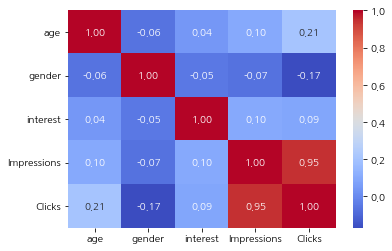

In [10]:
#성별, 나이, 흥미, 노출, 클릭수 상관관계분석
heat = sns.heatmap(campaign[['age', 'gender', 'interest', 'Impressions',
                             'Clicks']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

성별, 관심사, 나이에 따라서 노출 및 클릭수가 유의미한 상관관계를 가지고 있다고 보기 어렵다.

xyz가 어떤 광고일지 유추가 어렵다.

## 4. 각 Feature와 Approved_Conversion간 연관관계 분석

### 4-1. 캠페인 분석

In [11]:
campaign["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

In [12]:
# xyz 회사를 위한 3개의 다른 광고 캠페인
#각 캠페인을 직관적으로 이해하기 위해서 "campaignA", "campaignB", "campaignC"로 이름 변경

campaign["xyz_campaign_id"].replace({916:"campaign_a", 936:"campaign_b", 1178:"campaign_c"}, inplace=True)
campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,1,1,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,1,1,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,1,1,20,693,0,0.00,1,0
3,708815,campaign_a,103928,1,1,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,1,1,28,4133,1,1.29,1,1


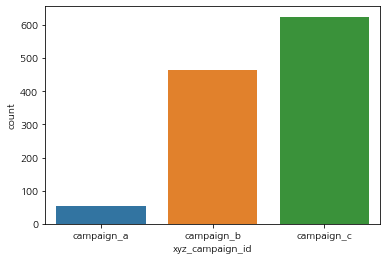

In [13]:
sns.countplot(x = 'xyz_campaign_id', data = campaign)
plt.show()

campaign_c의 광고가 가장 많음을 알 수 있음

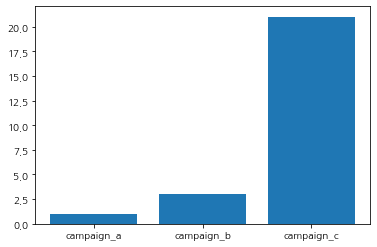

In [14]:
plt.bar(campaign['xyz_campaign_id'], campaign["Approved_Conversion"])
plt.show()

광고 승인도 campaign_c가 가장 많음

In [15]:
#campaign 비율 별 구매 횟수

sum_approve = campaign['Approved_Conversion'].groupby(campaign['xyz_campaign_id']).sum()
print(sum_approve)

count_xyz = campaign['xyz_campaign_id'].groupby(campaign['xyz_campaign_id']).count()
print(count_xyz)

xyz_campaign_id
campaign_a     24
campaign_b    183
campaign_c    872
Name: Approved_Conversion, dtype: int64
xyz_campaign_id
campaign_a     54
campaign_b    464
campaign_c    625
Name: xyz_campaign_id, dtype: int64


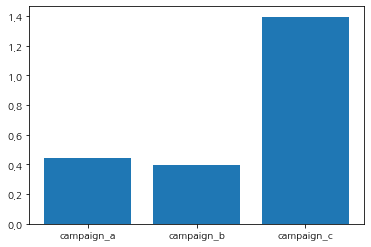

In [16]:
rat_approve = sum_approve/count_xyz
label = ['campaign_a', 'campaign_b', 'campaign_c']
plt.bar(label, rat_approve)
plt.show()

비율로 확인해도 campaign_c가 가장 높음을 알 수 있음

### 4-2. 나이/성별/관심을 기준으로 분석
#### 4-2-1. 나이 기준

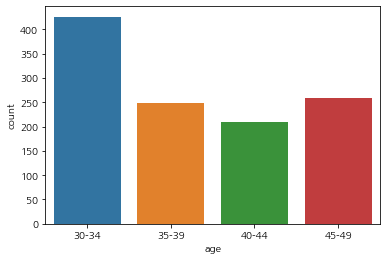

In [17]:
#나이별 개수
campaign["age"].replace({1:'30-34', 2:'35-39', 3:'40-44', 4:'45-49'}, inplace=True)

sns.countplot(x='age', data = campaign)
plt.show()

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

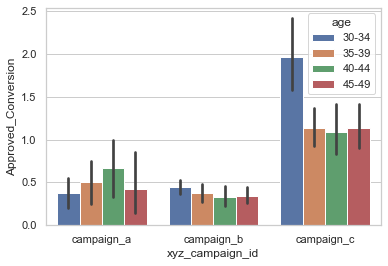

In [18]:
sns.set(style='whitegrid')
sns.barplot(x=campaign['xyz_campaign_id'], y=campaign['Approved_Conversion'], hue=campaign['age'],
           data = campaign)

campaign_a는 40-44세에서 가장 높은 구매수를 기록하였고, campagin_b, campaign_c는 30-34세에서 가장 높은 구매수를 기록하였다.
campaign_b는 전반적으로 비슷한 것을 보아 전 연령을 대상으로한 품목임을 예측해보았다.

#### 4-2-2 성별 기준

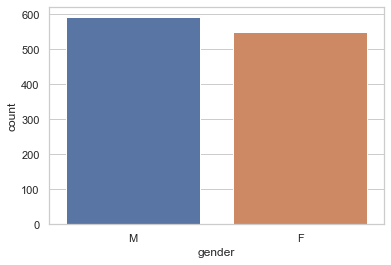

In [19]:
campaign["gender"].replace({1:'M', 0:'F'}, inplace=True)

sns.countplot(x='gender', data = campaign)
plt.show()

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

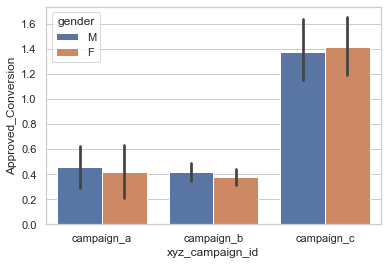

In [20]:
sns.set(style='whitegrid')
sns.barplot(x=campaign['xyz_campaign_id'], y=campaign['Approved_Conversion'], hue=campaign['gender'],
           data = campaign)

성별 측면에서는 세 캠페인 모두 차이가 없는 것으로 보인다.

#### 4-2-3 관심 기준

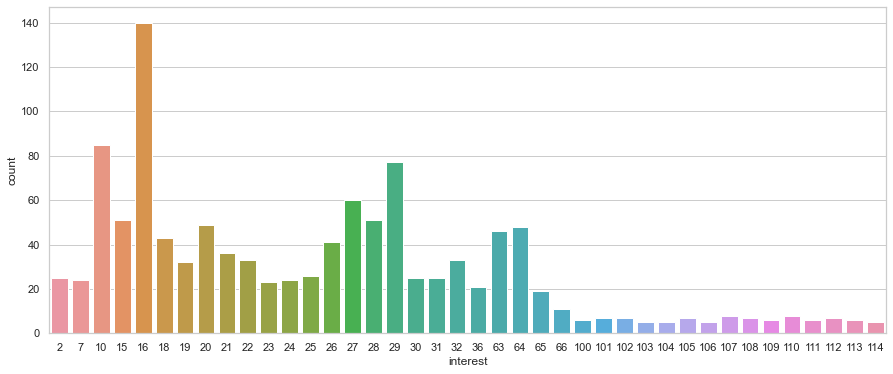

In [21]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='interest', data = campaign)
plt.show()

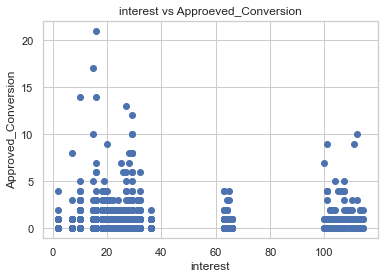

In [22]:
plt.scatter(campaign['interest'], campaign['Approved_Conversion'])
plt.title('interest vs Approeved_Conversion')
plt.xlabel('interest')
plt.ylabel('Approved_Conversion')
plt.show()

관심사가 100이상이거나 40 이하일 때 구매가 존재했다. 

#### 4-2-4 통합

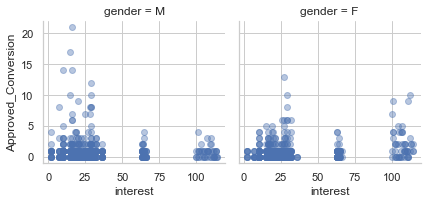

In [23]:
g = sns.FacetGrid(campaign, col="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend()

성별에 따라서는 대부분 비슷하나, 남성은 10~20 사이의 관심을 가진 사람이 구매도가 높았고, 여성은 100이상인 사람이 구매도가 높았다.

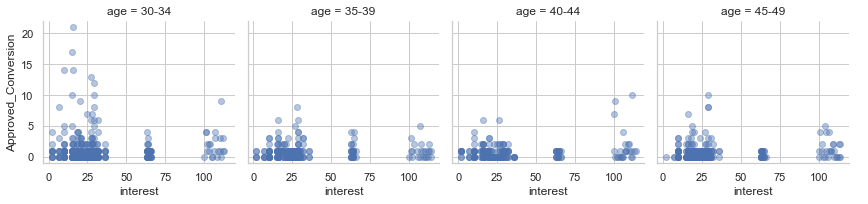

In [24]:
g=sns.FacetGrid(campaign, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend()

성별에 따라서는 30-34세 중 10-20 관심도를 가진 사람들이 구매도가 높았고, 나머지는 유사했으나 40-44세의 경우, 100 이상의 관심도를 가진 사람들이 구매도가 높았다.

### 4-3. 광고비 지출/노출/ 제품 문의 후 실제 구매 분석
#### 4-3-1 광고비 지출(Spent)기준

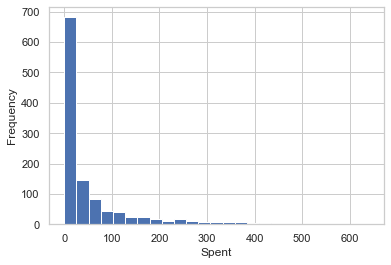

In [25]:
plt.hist(campaign['Spent'], bins=25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

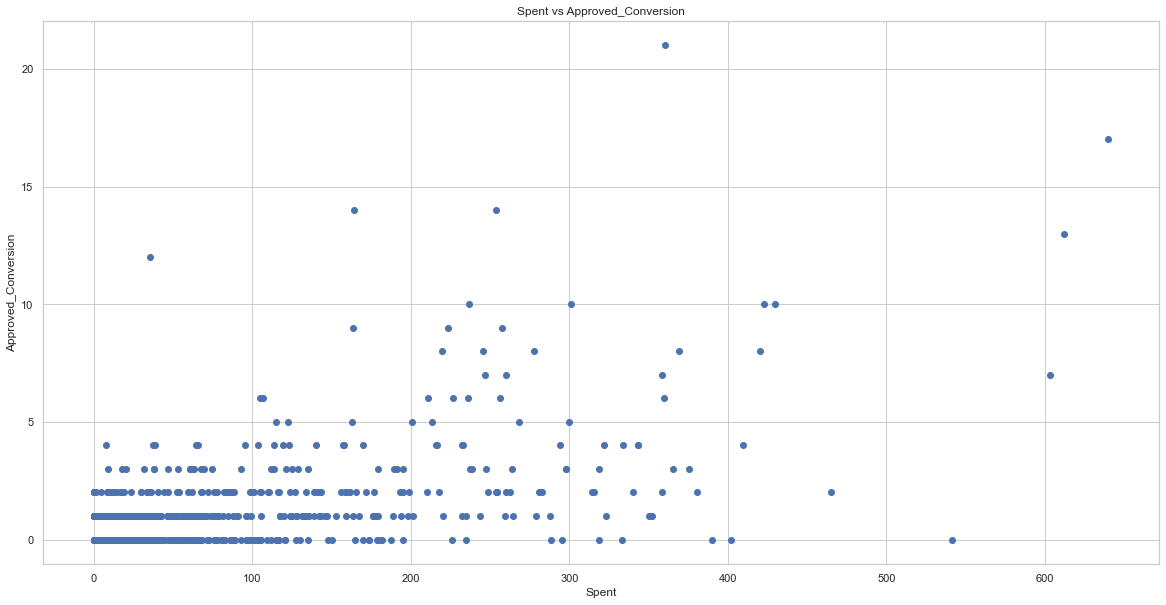

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(campaign['Spent'], campaign['Approved_Conversion'])
plt.title("Spent vs Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

광고비 지출을 보았을 때, 광고비 지출이 높을수록 빈도수가 높아지는것은 아니었다. 

#### 4-3-2 노출(Impression) 기준

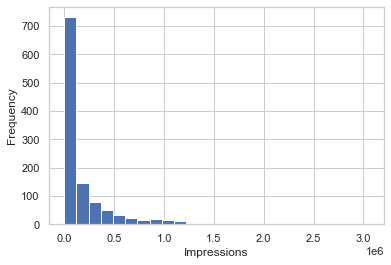

In [27]:
plt.hist(campaign['Impressions'], bins=25)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

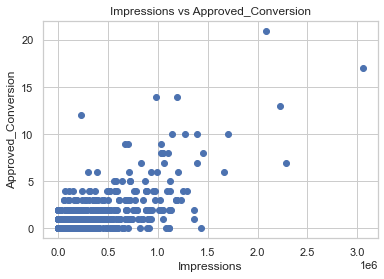

In [28]:
plt.scatter(campaign['Impressions'], campaign['Approved_Conversion'])
plt.title("Impressions vs Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

노출수를 살펴보았을 때, 노출수가 1.5회 이하면 대부분 비슷하지만, 1.5회 이상이되면 대부분 구매율이 높음을 알 수 있다.

#### 4-3-3 제품 문의(Total_Conversion) 기준

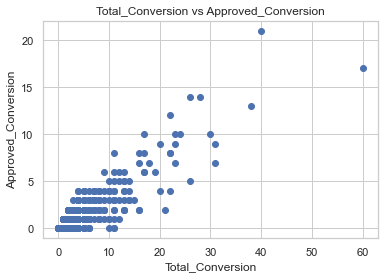

In [29]:
plt.scatter(campaign['Total_Conversion'], campaign['Approved_Conversion'])
plt.title("Total_Conversion vs Approved_Conversion")
plt.xlabel("Total_Conversion")
plt.ylabel("Approved_Conversion")
plt.show()

둘은 양의 상관관계를 가짐을 알 수 있다. 제품 문의율이 높을수록 구매율도 높아진다.

## 5. 변수 추가
### 5-1. CVR(클릭 대비 구매 비율)

In [30]:
campaign['CVR'] = campaign['Approved_Conversion']/campaign['Clicks']
campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CVR
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,1.0
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,NaN
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,1.0


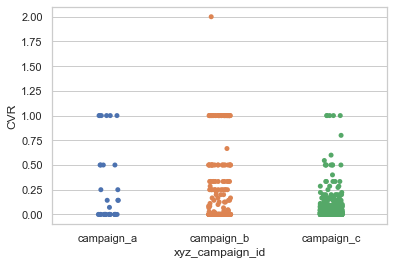

In [31]:
sns.stripplot(x=campaign['xyz_campaign_id'], y=campaign['CVR'], data = campaign, jitter=True)
plt.show()

### 5-2. CTR(노출 횟수 대비 클릭 비율)

In [32]:
#클릭 1이상인거 대상으로 나누기
campaign['CTR'] = campaign['Clicks']/campaign['Impressions']
campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CVR,CTR
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,1.0,0.000136
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.0,0.000112
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,NaN,0.000000
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.0,0.000235
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,1.0,0.000242


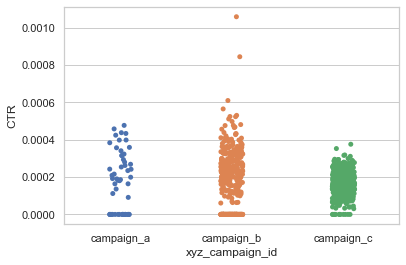

In [33]:
sns.stripplot(x=campaign['xyz_campaign_id'], y=campaign['CTR'], data = campaign, jitter=True)
plt.show()

CTR은 오히려 campaign_b가 높음을 알 수 있음

### 5-3. 클릭 대비 문의 비율

In [34]:
campaign['t/c'] = campaign['Total_Conversion']/campaign['Clicks']
campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CVR,CTR,t/c
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,1.0,0.000136,2.0
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.0,0.000112,1.0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,NaN,0.000000,inf
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.0,0.000235,1.0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,1.0,0.000242,1.0


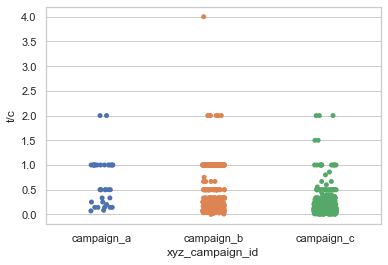

In [35]:
sns.stripplot(x=campaign['xyz_campaign_id'], y=campaign['t/c'], data = campaign, jitter=True)
plt.show()

## 분석 결과

1. 성별, 흥미, 노출, 클릭 수 상관관계 분석 - xyz가 어떤 광고일지 유추해보기

    상관관계가 존재하지 않아 유추 어려움
    

2. 클릭 대비 구매 비율 파악(CVR) - 광고 효용 분석 및 개선점 파악 
3. 클릭 대비 비용 
4. 노출 횟수 대비 클릭 비율(CTR) - 광고 집행의 의미?
5. 클릭 대비 문의 비율 
6. 문의 대비 구매 비율